# Energy Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score


## Read Data and Correct errors

In [2]:
df = pd.read_csv("../datsets/dataset1/archive/HomeC.csv", delimiter = ',')
 

#Dropped last line (null)
df = df.iloc[:-1] #drop last row


#Time is wrong, data was recorded minutely
time_index = pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
df = df.set_index(time_index)
df = df.drop(['time'], axis=1)

#Retirar [kW]
df.columns = [col.replace(' [kW]', '') for col in df.columns]


#Somar colunas 
df['Furnace'] = df[['Furnace 1','Furnace 2']].sum(axis=1)
df['Kitchen'] = df[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)
df = df.drop(['Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)
df = df.drop(['Furnace 1','Furnace 2'], axis=1)

#this column is the same as use
df = df.drop(columns=['House overall'])

#useless
df = df.drop(columns=['summary'])
df = df.drop(columns=['icon'])

#SAVE
#df.to_csv('../datsets/dataset1/archive/HomeC.csv', index=False)


df



/home/joaonps/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,use,gen,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
2016-01-01 05:00:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.082617,0.000567
2016-01-01 05:01:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.084533,0.000567
2016-01-01 05:02:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.083017,0.000617
2016-01-01 05:03:00,1.022050,0.003483,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.175417,0.000650
2016-01-01 05:04:00,1.139400,0.003467,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.300917,0.000783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-16 03:25:00,1.601233,0.003183,0.000050,0.041783,0.005267,0.008667,0.013483,0.032283,0.000983,0.003800,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.727683,0.000633
2016-12-16 03:26:00,1.599333,0.003233,0.000050,0.041750,0.005233,0.008433,0.013433,0.032200,0.000950,0.003800,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.729050,0.000600
2016-12-16 03:27:00,1.924267,0.003217,0.000033,0.042033,0.004983,0.008467,0.012933,0.032283,0.001000,0.003750,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.060117,0.000600
2016-12-16 03:28:00,1.978200,0.003217,0.000050,0.042100,0.005333,0.008233,0.012817,0.032183,0.000950,0.003767,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.116033,0.000650


In [3]:
#CORRECT cloudCover COLUMN

print(df['cloudCover'].unique())

#replace missing values with the next valid observation 
df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True) 

#change to floar
df['cloudCover'] = df['cloudCover'].astype('float')

df['cloudCover'].unique()

['cloudCover' '0.75' '0' '1' '0.31' '0.44' '0.13' '0.19' '0.25' '0.16'
 '0.21' '0.15' '0.14' '0.27' '0.28' '0.17' '0.05' '0.1' '0.26' '0.29'
 '0.11' '0.09' '0.12' '0.06' '0.02' '0.08' '0.04' '0.35' '0.22' '0.23'
 '0.54' '0.39' '0.03' '0.07' '0.76' '0.62' '0.18' '0.79' '0.48' '0.24'
 '0.57' 0.24 1.0 0.31 0.28 0.15 0.41 0.1 0.12 0.08 0.09 0.19 0.04 0.05
 0.29 0.27 0.35 0.18 0.06 0.03 0.11 0.14 0.25 0.78 0.0 0.16 0.21 0.23 0.17
 0.75 0.26 0.2 0.76 0.13 0.77 0.46 0.07 0.55 0.02 0.01 0.51 0.47 0.5 0.4
 0.3 0.22 0.43 0.33 0.6 0.68 0.66 0.45 0.34 0.52 0.67 0.48 0.49 0.39 0.37
 0.62 0.36 0.79 0.61 0.38 0.42 0.53 0.63 0.44 0.54 0.32 0.56 0.58 0.72
 0.57 0.73 0.71 0.64 0.59]


array([0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21, 0.15,
       0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09, 0.12,
       0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03, 0.07,
       0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 , 0.77,
       0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33, 0.6 ,
       0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61, 0.38,
       0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64, 0.59])

## Data Treatment

In [4]:
#GROUP DATA PER HOUR INTERVAL

#data  is in KwH, basta fazer a media
df = df.resample('H').mean()

#DROP LAST LINE (INCOMPLETE HOUR)
df.drop(df.tail(1).index,inplace=True)

"""
df['month'] = df.index.month
df['weekday'] = df.index.day
df['hour'] = df.index.hour
#df=pd.get_dummies(df)
"""

#Intruduce consumpt in the last 5 hours
"""for step in range(1,6):
    col_name = "use" + str(step) + "ago"
    df[col_name] = df["use"].shift(step, axis = 0)
    
df = df.iloc[5:]   #drop 5 first rows since there is no data relating last 5 hours
"""
df

,use,gen,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
2016-01-01 05:00:00,1.044130,0.003307,0.000064,0.241814,0.037861,0.063351,0.013046,0.038881,0.001042,0.021652,...,29.264667,1016.888000,9.150333,0.750000,282.100000,0.000000,24.383333,0.000,0.393188,0.000821
2016-01-01 06:00:00,0.918167,0.003422,0.000099,0.043294,0.075522,0.112942,0.012836,0.039181,0.001021,0.004216,...,29.364667,1016.232000,8.284000,0.750000,284.733333,0.000000,23.866000,0.000,0.456708,0.000749
2016-01-01 07:00:00,0.714736,0.003448,0.000043,0.043416,0.059486,0.007184,0.013299,0.034439,0.001014,0.004246,...,29.034000,1015.989000,7.927000,0.750000,279.400000,0.000000,23.469000,0.000,0.372170,0.000726
2016-01-01 08:00:00,0.960013,0.003447,0.000138,0.065014,0.060412,0.007045,0.012925,0.034195,0.001016,0.004274,...,30.395333,1016.042000,5.684667,0.750000,265.000000,0.000000,24.202667,0.000,0.616370,0.000806
2016-01-01 09:00:00,0.639836,0.003439,0.000060,0.043392,0.035106,0.007143,0.013220,0.031830,0.001014,0.004258,...,29.673333,1015.815000,6.975000,0.625000,265.500000,0.000000,24.423333,0.000,0.343842,0.000796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-15 22:00:00,1.210261,0.004140,0.000071,0.041784,0.033194,0.008212,0.012851,0.031983,0.040707,0.003049,...,29.789833,1006.190000,12.677667,0.216667,256.716667,0.000000,20.654667,0.000,0.830258,0.000735
2016-12-15 23:00:00,1.096999,0.004137,0.000075,0.041853,0.044236,0.008119,0.012814,0.032249,0.000992,0.003084,...,29.392667,1012.775333,11.183333,0.816000,189.666667,0.000373,28.414667,0.008,0.772467,0.000732
2016-12-16 00:00:00,1.276585,0.004109,0.000059,0.041711,0.050492,0.105546,0.012526,0.030902,0.040522,0.003001,...,29.813667,1012.628500,11.969500,0.310000,197.633333,0.004313,29.379167,0.182,0.796006,0.000639
2016-12-16 01:00:00,1.260231,0.004141,0.000100,0.041921,0.049140,0.123134,0.012743,0.031992,0.000999,0.003104,...,28.988000,1012.129667,10.720667,0.310000,197.900000,0.010600,30.864333,0.510,0.823418,0.000766


# LSTM

In [65]:
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, LeakyReLU, Dropout
from keras.callbacks import EarlyStopping

In [81]:
past_window = 10


featuresNames = ["use"]
"""featuresNames = list(df.columns)
featuresNames.remove('gen')             #generation
featuresNames.remove('Solar')           #solar generation"""

features = df[featuresNames]

x_train, x_test = train_test_split(features.values, test_size=300, shuffle=False)
x_train, x_val = train_test_split(x_train, test_size=0.1, shuffle=False)
print("Features Train: ", x_train.shape)
print("Features Validation: ", x_val.shape)
print("Features Test: ", x_test.shape)

y_test_UnScalled = x_test[:,0][past_window:]


scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

y_train = x_train[:,0]
y_val = x_val[:,0]
y_test = x_test[:,0]


Features Train:  (7288, 1)
Features Validation:  (810, 1)
Features Test:  (300, 1)


In [82]:
num_features = features.shape[1]
batch_size=64

train_generator = TimeseriesGenerator(x_train, y_train, length=past_window, batch_size=batch_size)
val_generator = TimeseriesGenerator(x_val, y_val, length=past_window, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=past_window, batch_size=batch_size)


In [83]:
def define_model(past_window, num_features):
    
    model = Sequential()
    model.add(LSTM(units=128, return_sequences=True, input_shape=(past_window, num_features)))
    model.add(LSTM(units=128))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = 'mean_absolute_error')
    model.summary()
    
    return model

def train(model, train_generator, val_generator):
    early_stopping = EarlyStopping(monitor="val_loss", 
                                   patience=5, 
                                   mode="min")
    
    history = model.fit_generator(train_generator, 
                                  epochs=32,
                                  validation_data=val_generator, 
                                  shuffle = False, 
                                  callbacks=[early_stopping])
    
    loss_per_epoch = history.history['loss']
    plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
    

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 10, 128)           66560     
                                                                 
 lstm_28 (LSTM)              (None, 128)               131584    
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/32


<ipython-input-83-bd312af46b99>:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


114/114 [==============================] - 5s 23ms/step - loss: 0.0060 - mean_absolute_error: 0.0453 - val_loss: 0.0020 - val_mean_absolute_error: 0.0319
Epoch 2/32
114/114 [==============================] - 2s 17ms/step - loss: 0.0040 - mean_absolute_error: 0.0362 - val_loss: 0.0016 - val_mean_absolute_error: 0.0272
Epoch 3/32
114/114 [==============================] - 2s 18ms/step - loss: 0.0032 - mean_absolute_error: 0.0317 - val_loss: 0.0015 - val_mean_absolute_error: 0.0256
Epoch 4/32
114/114 [==============================] - 2s 16ms/step - loss: 0.0030 - mean_absolute_error: 0.0300 - val_loss: 0.0015 - val_mean_absolute_error: 0.0255
Epoch 5/32
114/114 [==============================] - 2s 16ms/step - loss: 0.0030 - mean_absolute_error: 0.0299 - val_loss: 0.0015 - val_mean_absolute_error: 0.0255
Epoch 6/32
114/114 [==============================] - 2s 16ms/step - loss: 0.0030 - mean_absolute_error: 0.0299 - val_loss: 0.0015 - val_mean_absolute_error: 0.0255
Epoch 7/32
114/114 [=

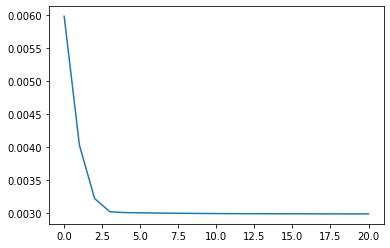

In [84]:
model = define_model(past_window, num_features)
train(model, train_generator, val_generator)

<ipython-input-85-025d86d8b016>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  prediction = model.predict_generator(test_generator)


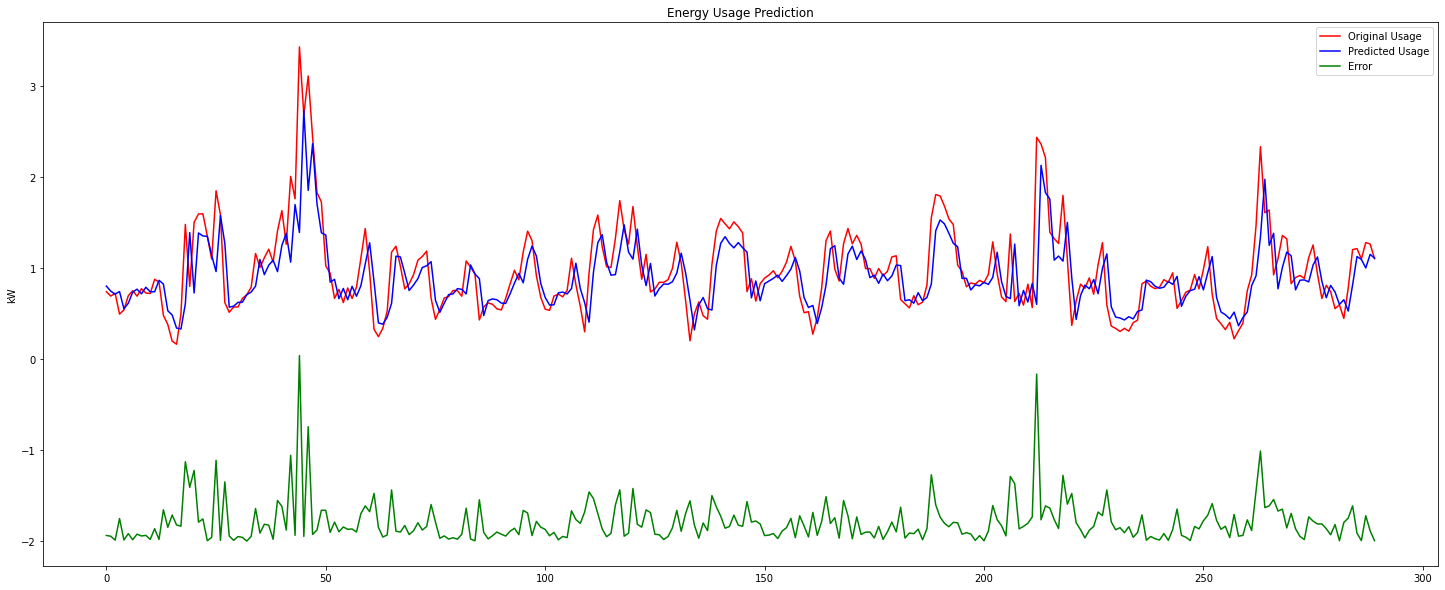

MAPE:  0.2458924861974073
MAE:  0.21085992585025976
MSE:  0.10066362862743367
R2:  0.5398491664597471


In [85]:
prediction = model.predict_generator(test_generator)
prediction = np.repeat(prediction, num_features, axis=-1)
prediction = scaler.inverse_transform(prediction)[:,0].reshape(-1, 1)

diff = [abs(prediction[i]-y_test_UnScalled[i])-2 for i in range(len(prediction))]

plt.figure(figsize=(25,10))
plt.plot(y_test_UnScalled, color='red', label='Original Usage')
plt.plot(prediction, color='blue', label='Predicted Usage')
plt.plot(diff, color='green', label='Error')
plt.title('Energy Usage Prediction')
plt.ylabel('kW')
plt.legend()
plt.show()

print("MAPE: ", mean_absolute_percentage_error(y_test_UnScalled, prediction))
print("MAE: ", mean_absolute_error(y_test_UnScalled, prediction))
print("MSE: ", mean_squared_error(y_test_UnScalled, prediction))
print("R2: ", r2_score(y_test_UnScalled, prediction))